### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingRegressor
from matplotlib.lines import Line2D

### Importing the dataset

In [2]:
df = pd.read_csv('../../../Datasets/RQ1/grunt_metrics.csv')
df.head(10)

,Unnamed: 0,version,release_date,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
0,0,v0.4.0,2013-02-18,1361206207,1.6,0,1.0,1.0,712,407,3753
1,1,v0.4.1,2013-03-13,1363184208,1.6,0,1.0,1.0,772,413,3939
2,2,v0.4.2,2013-12-16,1387222558,1.6,0,1.0,1.0,799,447,4025
3,3,_pr1108_author_head,2014-03-31,1396233124,1.6,0,1.0,1.0,725,408,3819
4,4,_pr1170_author_head,2014-06-20,1403285855,1.6,0,1.0,1.0,602,362,3541
5,5,v0.4.3,2014-03-07,1394216677,1.6,0,1.0,1.0,724,408,3815
6,6,v0.4.4,2014-03-12,1394656115,1.6,0,1.0,1.0,724,408,3815
7,7,v0.4.5,2014-05-12,1399916630,1.6,0,1.0,1.0,591,355,3479
8,8,v1.0.0,2016-04-04,1459811577,1.6,0,1.0,1.0,676,421,3734
9,9,v1.0.0-rc1,2016-02-11,1455212775,1.6,0,1.0,1.0,609,369,3582


### Information of the Dataframe 

In [3]:
df.describe()

,Unnamed: 0,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
count,26.000000,2.600000e+01,2.600000e+01,26.0,26.0,26.0,26.000000,26.000000,26.000000
mean,12.500000,1.524490e+09,1.600000e+00,0.0,1.0,1.0,671.346154,399.461538,3703.576923
std,7.648529,1.116757e+08,2.264420e-16,0.0,0.0,0.0,47.502372,19.649388,115.666477
min,0.000000,1.361206e+09,1.600000e+00,0.0,1.0,1.0,591.000000,355.000000,3479.000000
25%,6.250000,1.400759e+09,1.600000e+00,0.0,1.0,1.0,651.000000,394.000000,3657.250000
50%,12.500000,1.540676e+09,1.600000e+00,0.0,1.0,1.0,662.000000,403.500000,3702.500000
75%,18.750000,1.621176e+09,1.600000e+00,0.0,1.0,1.0,677.500000,408.000000,3734.000000
max,25.000000,1.675178e+09,1.600000e+00,0.0,1.0,1.0,799.000000,447.000000,4025.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            26 non-null     int64  
 1   version               26 non-null     object 
 2   release_date          26 non-null     object 
 3   timestamp             26 non-null     int64  
 4   sqale_debt_ratio      26 non-null     float64
 5   vulnerabilities       26 non-null     int64  
 6   security_rating       26 non-null     float64
 7   sqale_rating          26 non-null     float64
 8   complexity            26 non-null     int64  
 9   cognitive_complexity  26 non-null     int64  
 10  ncloc                 26 non-null     int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 2.4+ KB


### Updating Version Names

In [5]:
df['version'] = df['version'].str.replace('v', '')

In [6]:
df['version'] = 'v' + df['version']
df['version']

0                   v0.4.0
1                   v0.4.1
2                   v0.4.2
3     v_pr1108_author_head
4     v_pr1170_author_head
5                   v0.4.3
6                   v0.4.4
7                   v0.4.5
8                   v1.0.0
9               v1.0.0-rc1
10                  v1.0.1
11                  v1.0.2
12                  v1.0.3
13                  v1.0.4
14                  v1.1.0
15                  v1.2.0
16                  v1.2.1
17                  v1.3.0
18                  v1.4.0
19                  v1.4.1
20                  v1.5.0
21                  v1.5.1
22                  v1.5.2
23                  v1.5.3
24                  v1.6.0
25                  v1.6.1
Name: version, dtype: object

### Sorting accoriding to the timeframe

In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
df.head(20)

,version,release_date,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
0,v0.4.0,2013-02-18,1361206207,1.6,0,1.0,1.0,712,407,3753
1,v0.4.1,2013-03-13,1363184208,1.6,0,1.0,1.0,772,413,3939
2,v0.4.2,2013-12-16,1387222558,1.6,0,1.0,1.0,799,447,4025
3,v_pr1108_author_head,2014-03-31,1396233124,1.6,0,1.0,1.0,725,408,3819
4,v_pr1170_author_head,2014-06-20,1403285855,1.6,0,1.0,1.0,602,362,3541
5,v0.4.3,2014-03-07,1394216677,1.6,0,1.0,1.0,724,408,3815
6,v0.4.4,2014-03-12,1394656115,1.6,0,1.0,1.0,724,408,3815
7,v0.4.5,2014-05-12,1399916630,1.6,0,1.0,1.0,591,355,3479
8,v1.0.0,2016-04-04,1459811577,1.6,0,1.0,1.0,676,421,3734
9,v1.0.0-rc1,2016-02-11,1455212775,1.6,0,1.0,1.0,609,369,3582


## Correlation

In [9]:
df_cor = df.drop(['version', 'release_date', 'timestamp','sqale_rating'], axis=1)

### Pearson Correlation

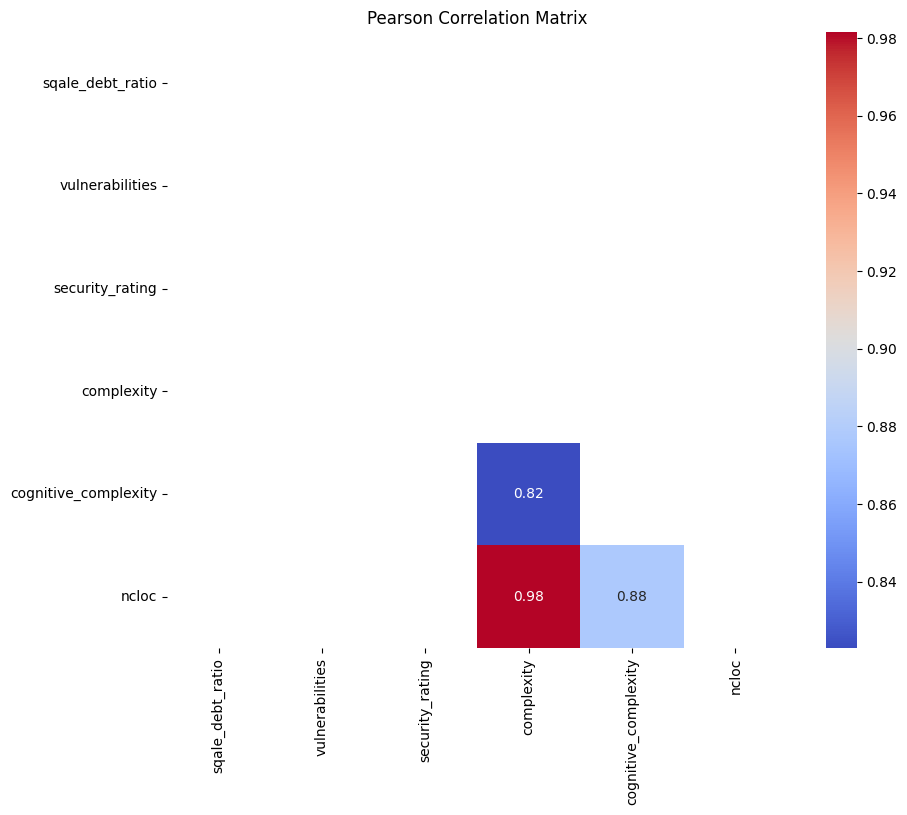

In [10]:
correlation_matrix = df_cor.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Pearson Correlation Matrix')
plt.show()

### Spearman Correlation

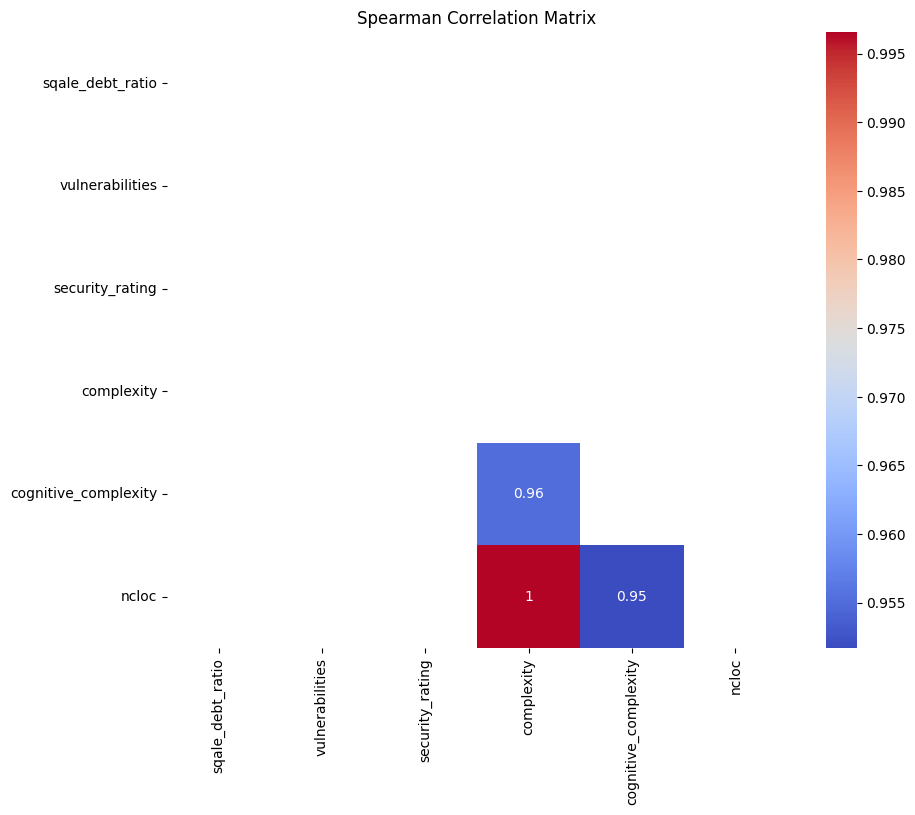

In [11]:
correlation_matrix = df_cor.corr(method ='spearman')

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Spearman Correlation Matrix')
plt.show()

In [12]:
df['timestamp']

0     1361206207
1     1363184208
2     1387222558
3     1396233124
4     1403285855
5     1394216677
6     1394656115
7     1399916630
8     1459811577
9     1455212775
10    1459879814
11    1518039686
12    1528071909
13    1553280468
14    1584412394
15    1593797256
16    1594132068
17    1597780110
18    1619105367
19    1621866300
20    1649647619
21    1649690255
22    1649764687
23    1652184368
24    1674956424
25    1675177851
Name: timestamp, dtype: int64

### Checking for the categorical and numerical columns

In [13]:
df_cor.columns

Index(['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'complexity',
       'cognitive_complexity', 'ncloc'],
      dtype='object')

In [14]:
columns = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating','complexity',
       'cognitive_complexity', 'ncloc']
for col in columns: 
    print(f'Count for {col}')   
    print(df[col].value_counts())
    print('------------------------')

Count for sqale_debt_ratio
sqale_debt_ratio
1.6    26
Name: count, dtype: int64
------------------------
Count for vulnerabilities
vulnerabilities
0    26
Name: count, dtype: int64
------------------------
Count for security_rating
security_rating
1.0    26
Name: count, dtype: int64
------------------------
Count for sqale_rating
sqale_rating
1.0    26
Name: count, dtype: int64
------------------------
Count for complexity
complexity
654    3
662    3
663    3
724    2
676    2
643    2
651    2
712    1
772    1
799    1
725    1
602    1
591    1
609    1
678    1
642    1
Name: count, dtype: int64
------------------------
Count for cognitive_complexity
cognitive_complexity
404    4
408    3
421    3
398    3
381    2
394    2
403    2
407    1
413    1
447    1
362    1
355    1
369    1
380    1
Name: count, dtype: int64
------------------------
Count for ncloc
ncloc
3665    3
3601    2
3706    2
3815    2
3734    2
3753    1
3701    1
3702    1
3703    1
3657    1
3658    1
3597  

### Categorical Columns Visulaization

C:\Users\sadik\AppData\Local\Temp\ipykernel_16208\1301555775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\sadik\AppData\Local\Temp\ipykernel_16208\1301555775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\sadik\AppData\Local\Temp\ipykernel_16208\1301555775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\sadik\AppData\Local\Temp\ipykernel_16208

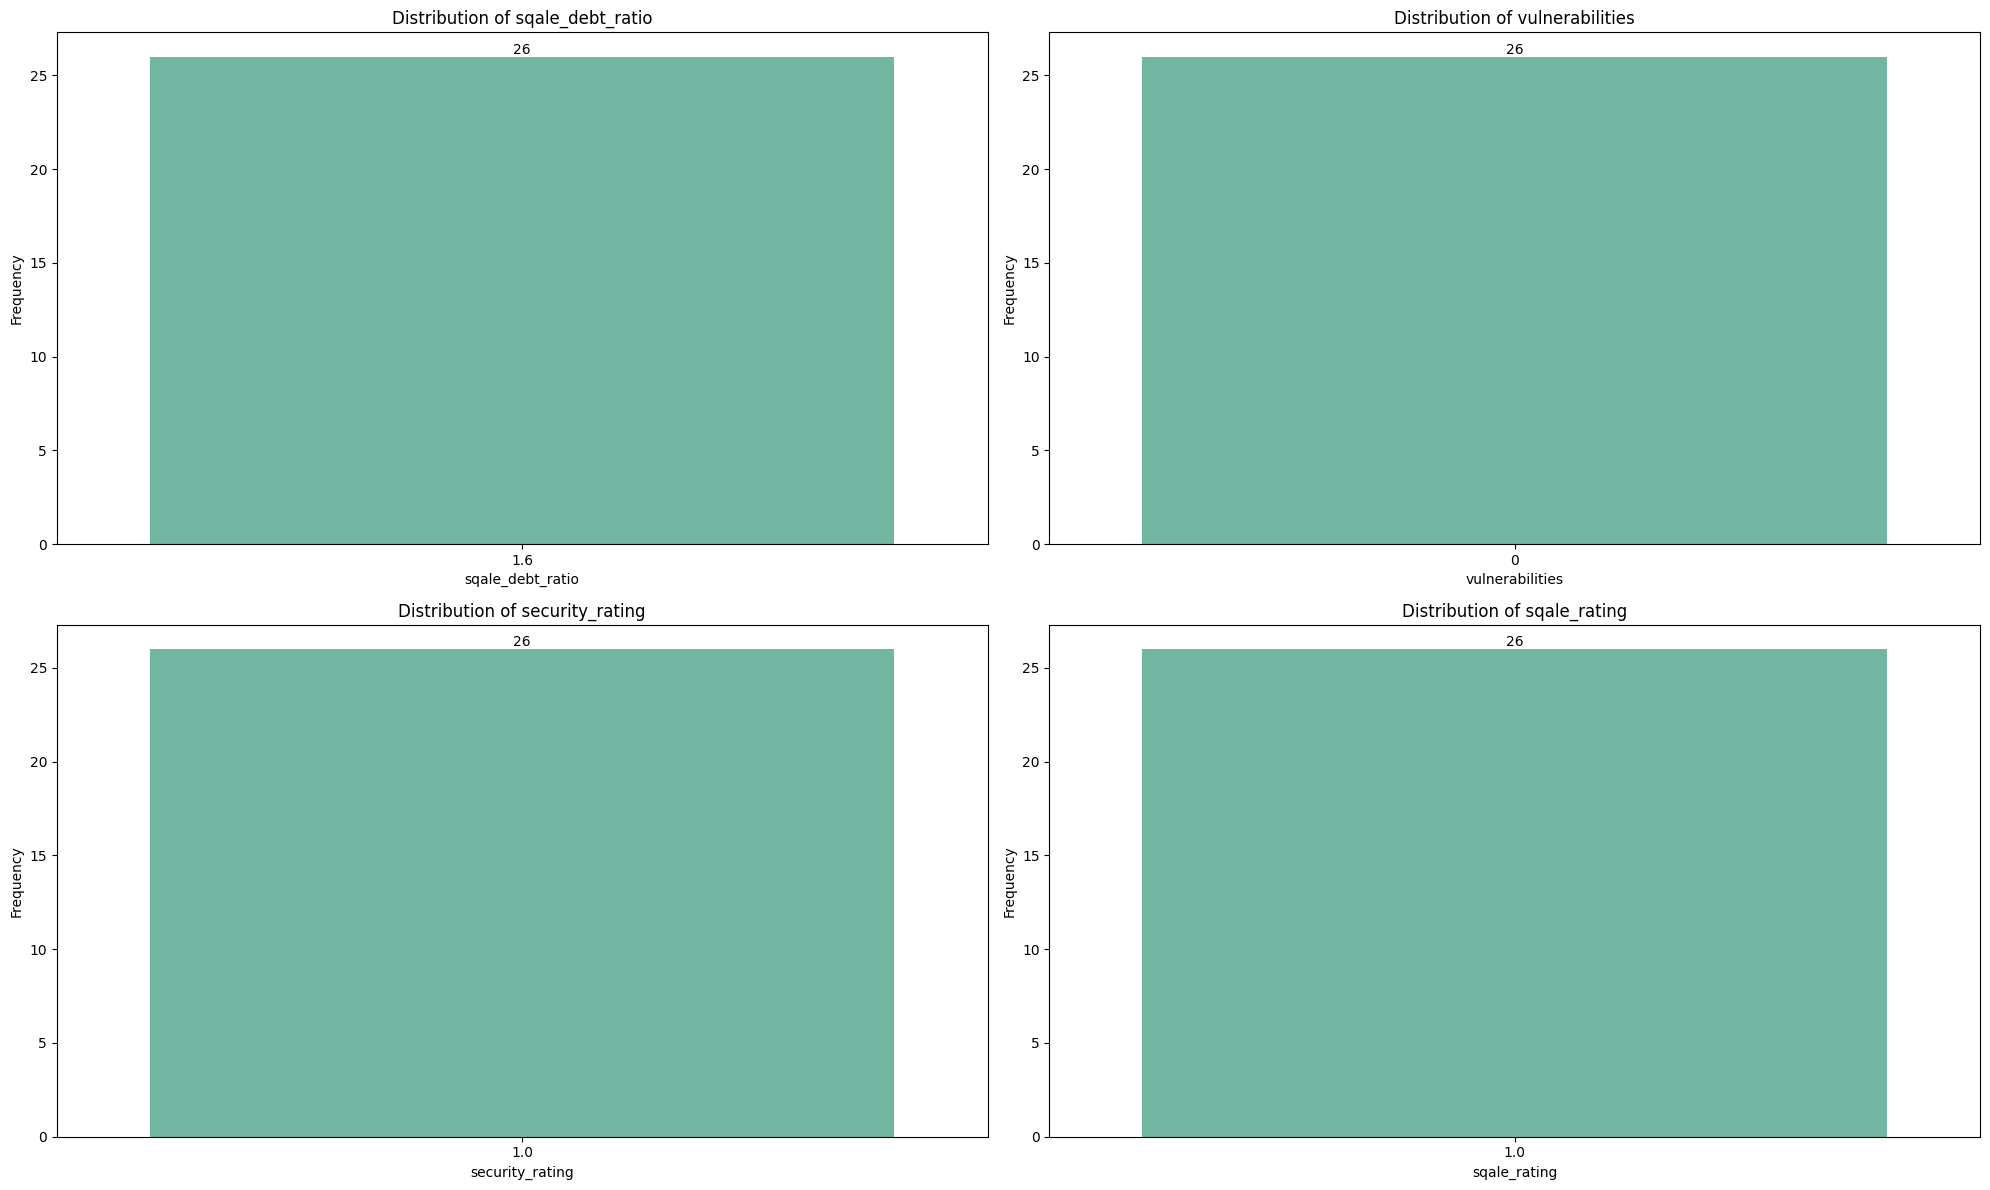

In [15]:
categorical_columns = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating']
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
for ax, col in zip(axs.flatten(), categorical_columns):
    countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}')
    for p in countplot.patches:
        countplot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 5), 
                           textcoords = 'offset points')
plt.tight_layout()
plt.show()

### Numerical Columns Visualization

#### Using Histogram

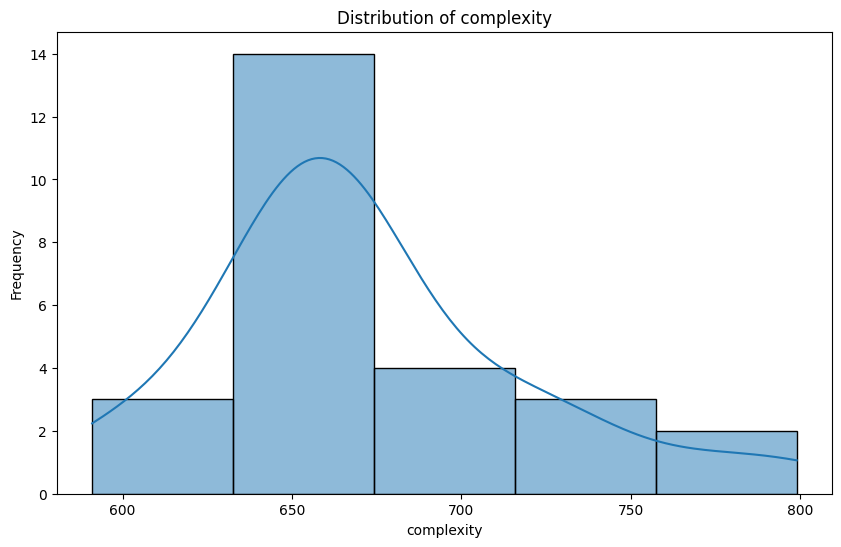

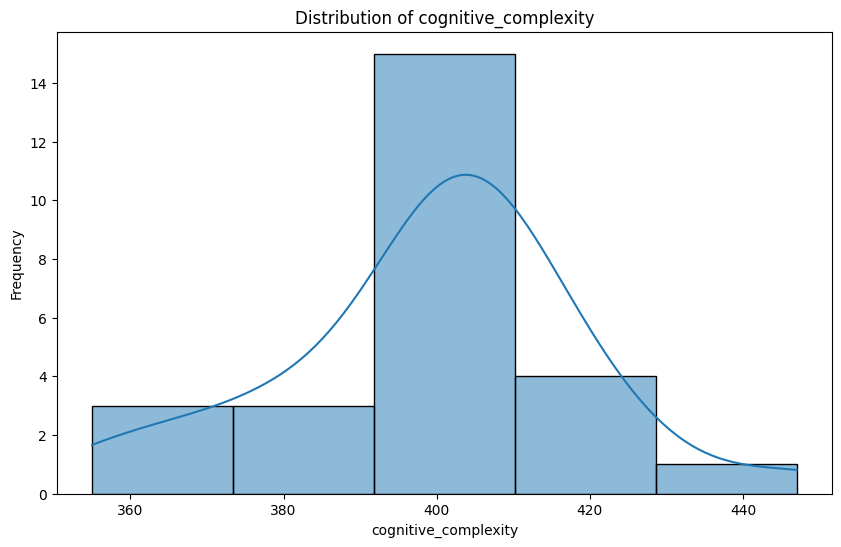

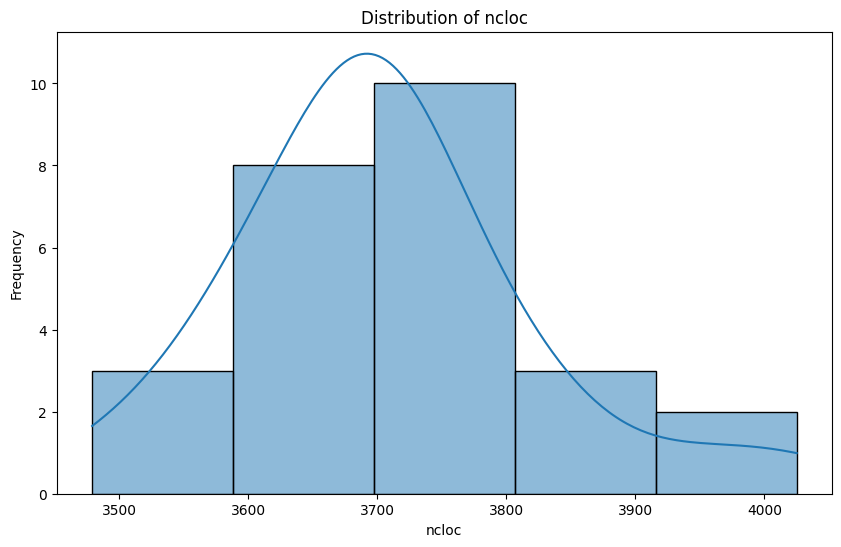

In [16]:
numerical_columns = ['complexity', 'cognitive_complexity', 'ncloc']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    histplot = sns.histplot(df[col], bins=5, kde=True)
    plt.title(f'Distribution of {col}')
    histplot.set_ylabel('Frequency')
    plt.show()

#### Using Boxplot

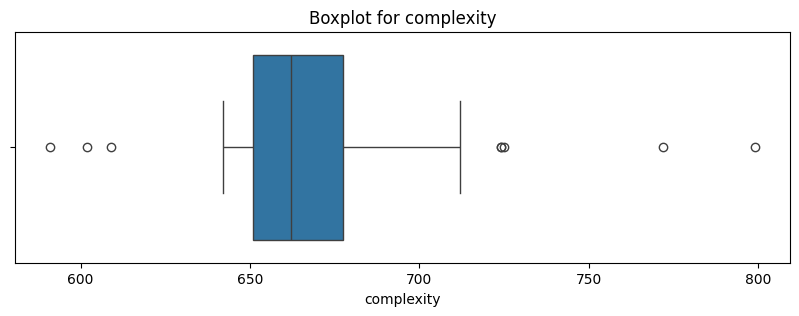

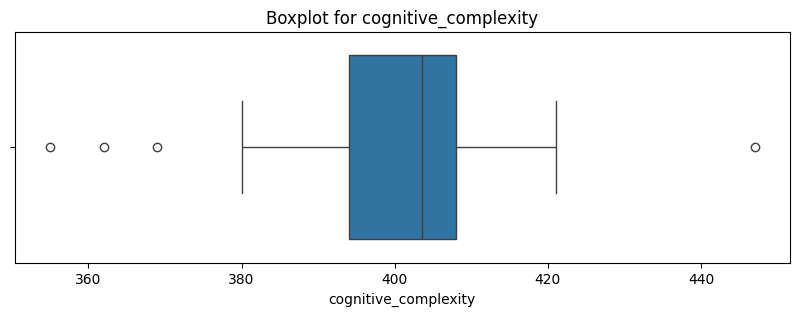

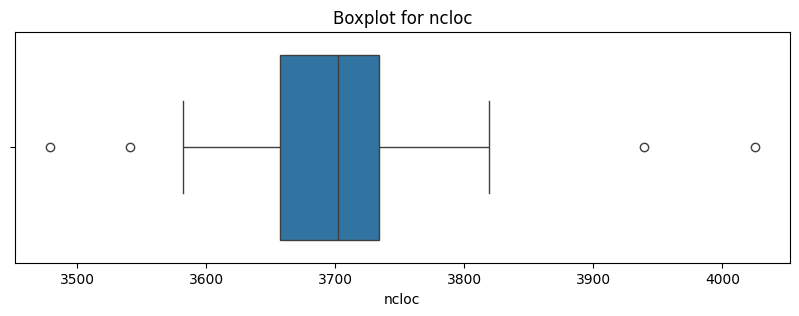

In [17]:
for col in numerical_columns:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

### Visualizing every column using Pairplot

In [18]:
columns_for_controlChart = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating', 'complexity', 'cognitive_complexity', 'ncloc']

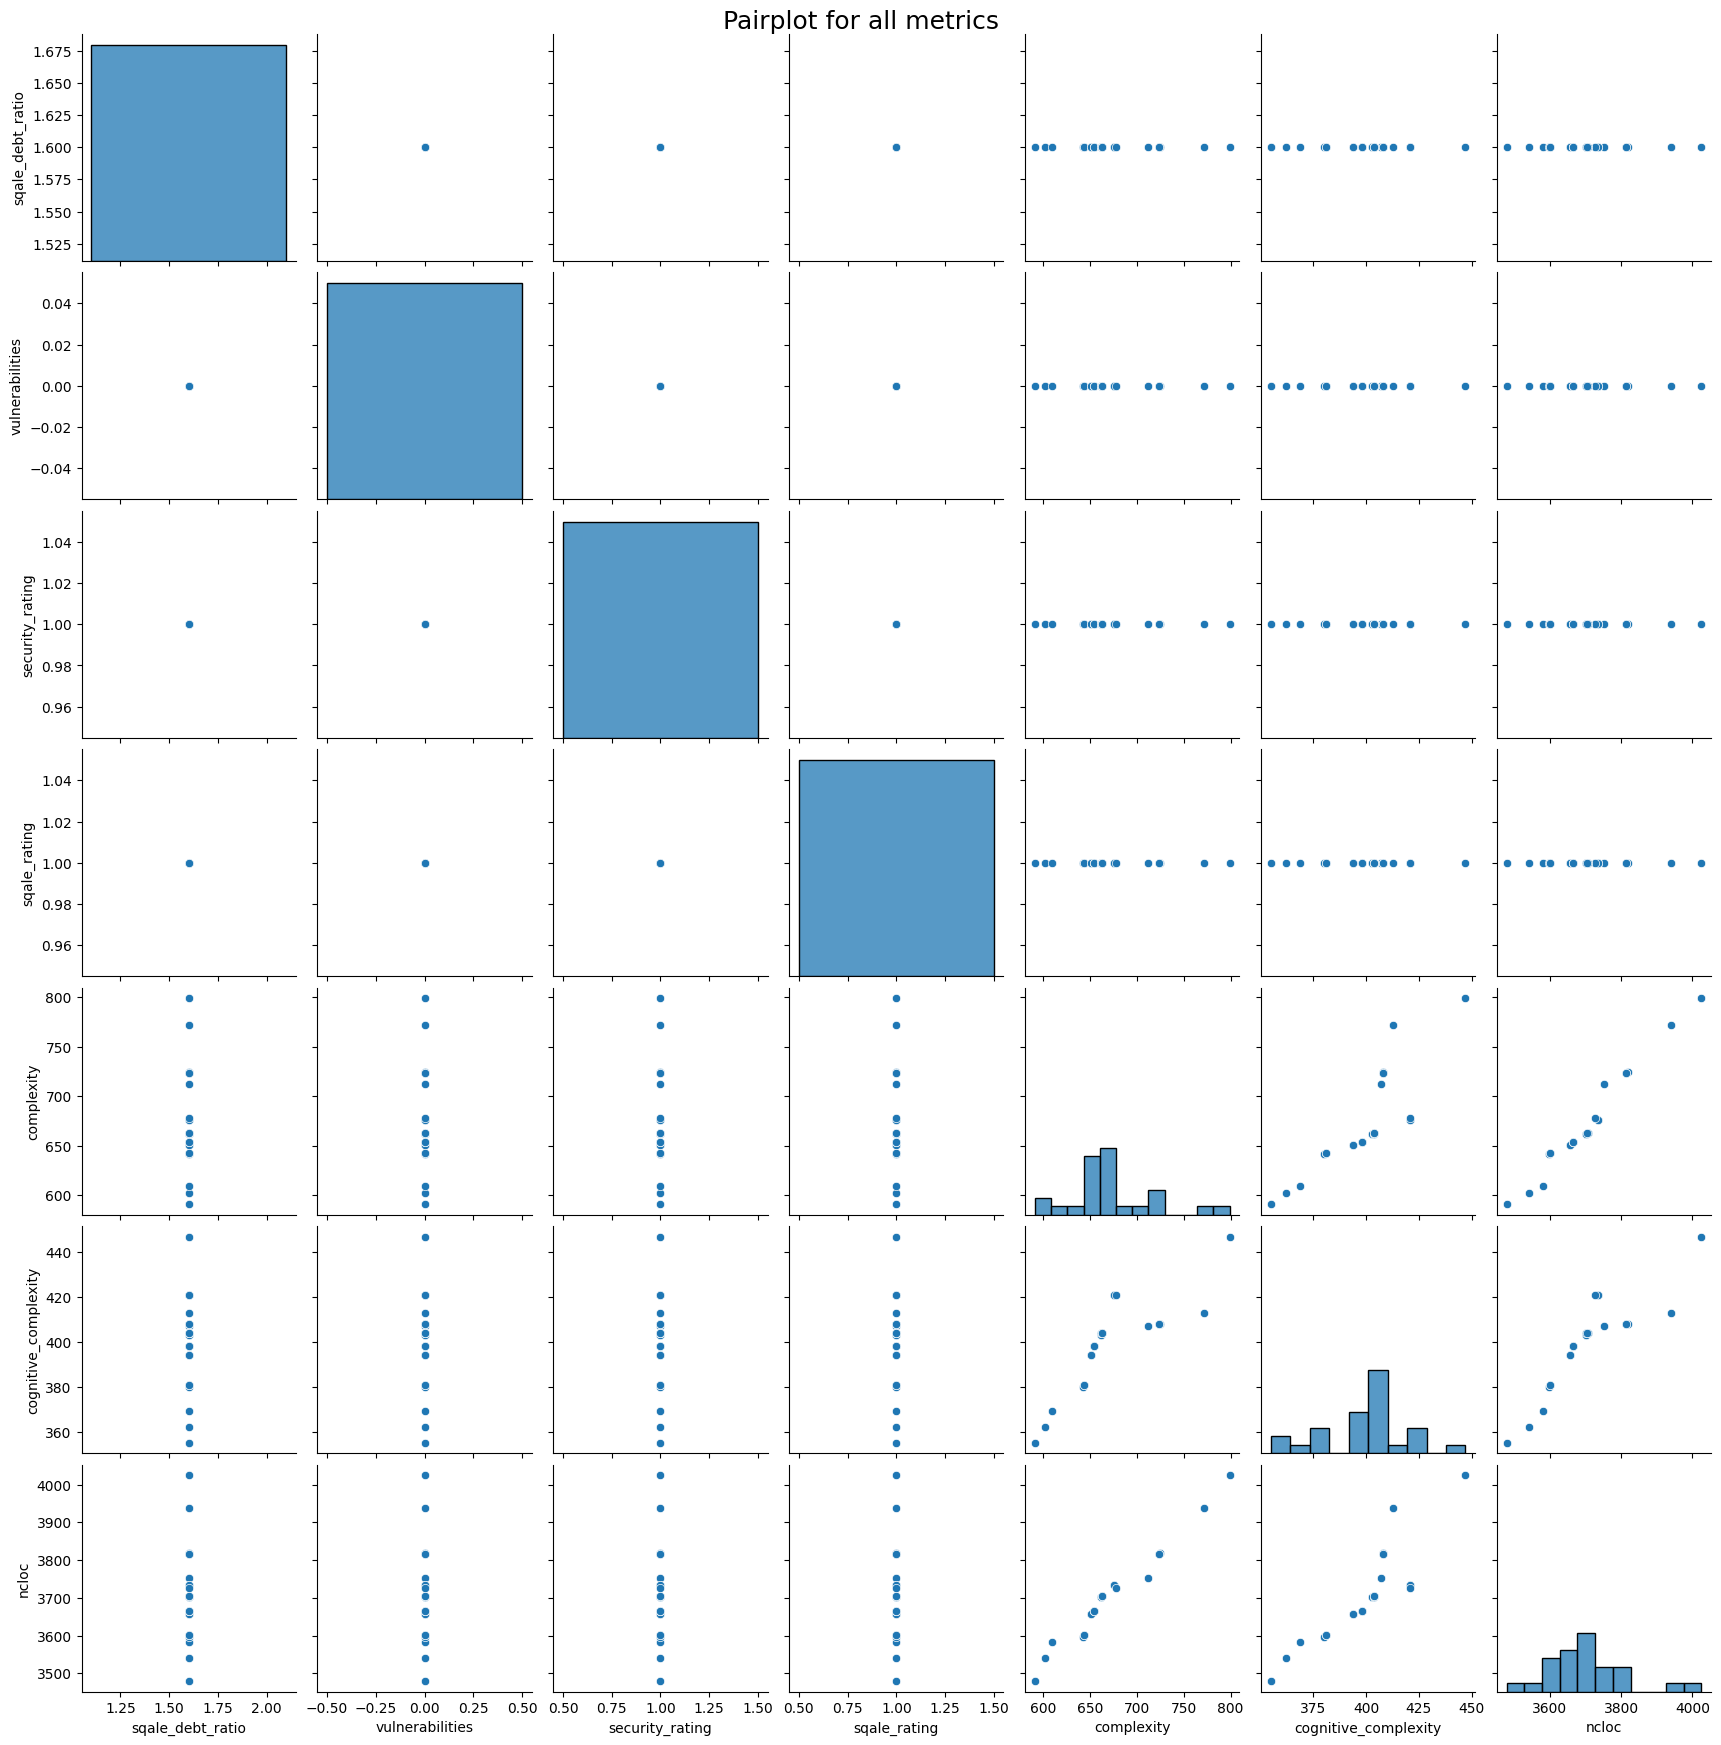

In [19]:
sns.pairplot(df[columns_for_controlChart])
plt.suptitle('Pairplot for all metrics', y=1., size=18)
plt.show()

### Visualization using Machine Learning Models

In [20]:
X = df[['ncloc']]
target_columns = ['complexity', 'cognitive_complexity', 'sqale_rating']

In [21]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42),
    'Support Vector': SVR(kernel='linear'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

Linear Regression Model for complexity:
Mean Squared Error: 137.05803203991525
R-squared: 0.8590622653192908

Decision Tree Model for complexity:
Mean Squared Error: 398.1666666666667
R-squared: 0.590562426804536

Random Forest Model for complexity:
Mean Squared Error: 462.932333333333
R-squared: 0.5239634379730929

Gradient Boosting Model for complexity:
Mean Squared Error: 404.83608603925876
R-squared: 0.583704216132614

Support Vector Model for complexity:
Mean Squared Error: 121.7387944634285
R-squared: 0.8748151446575616

MLP Regressor Model for complexity:
Mean Squared Error: 1465.880315275128
R-squared: -0.5073749992831731

Linear Regression Model for cognitive_complexity:
Mean Squared Error: 153.2922412082358
R-squared: 0.5162587058646135

Decision Tree Model for cognitive_complexity:
Mean Squared Error: 52.833333333333336
R-squared: 0.8332748948106592

Random Forest Model for cognitive_complexity:
Mean Squared Error: 43.776650000000096
R-squared: 0.8618548913043476

Gradient B

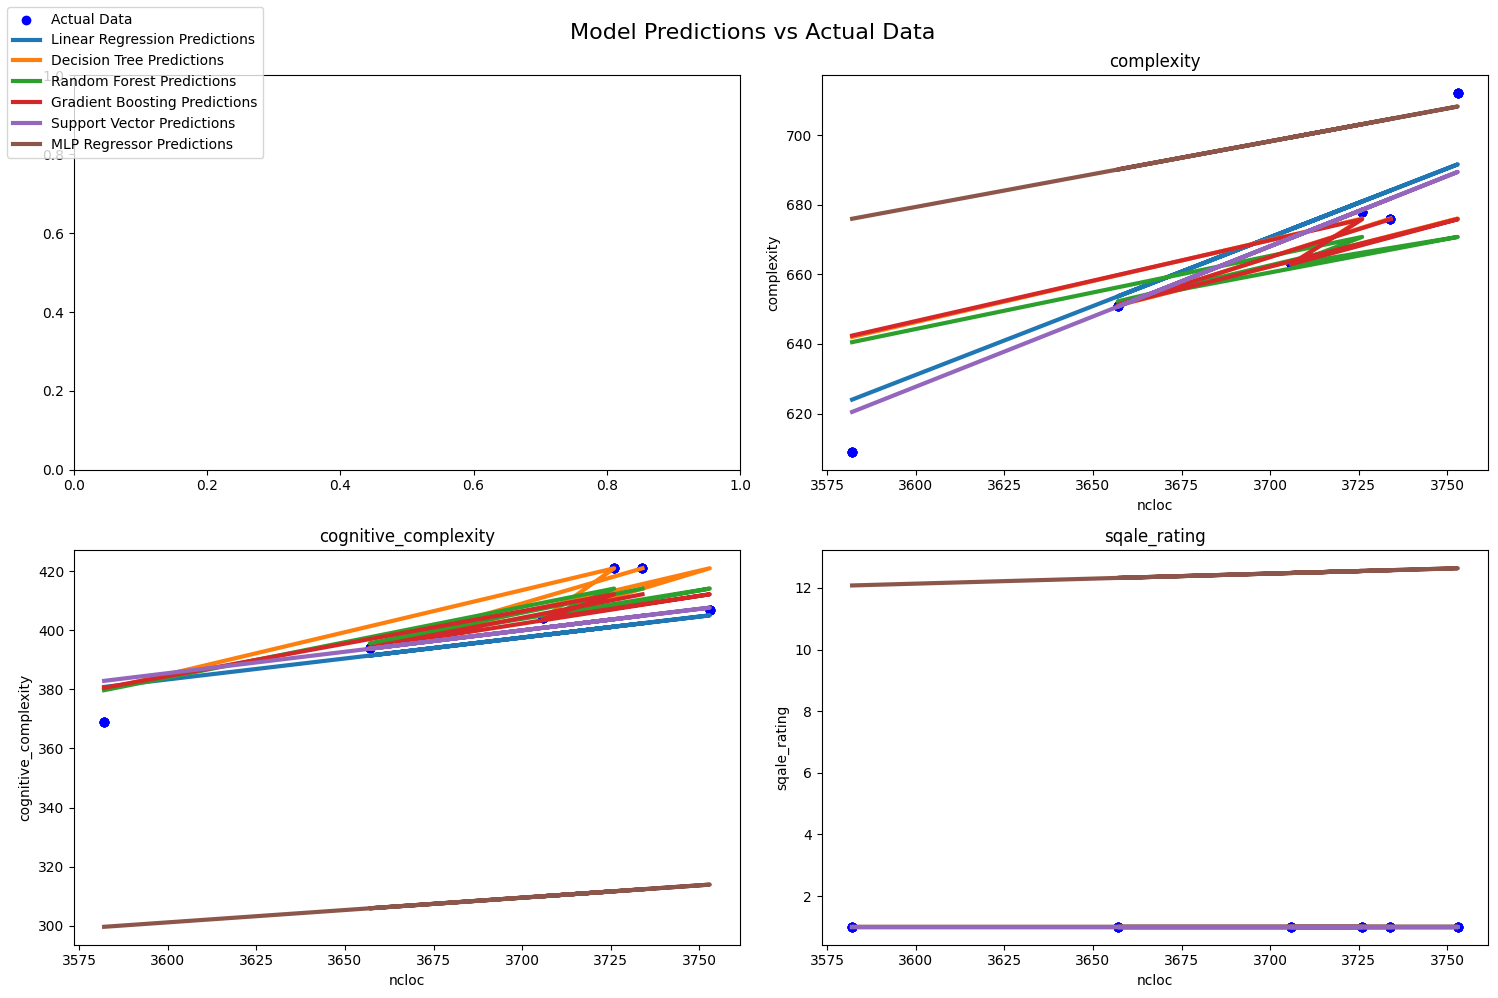

In [22]:
# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Create a list to store handles for the legend
handles = []


# Loop over each target variable
for i, target in enumerate(target_columns):
    y = df[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Evaluate models
    results = {}
    for j, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        results[name] = {'MSE': mse, 'R-squared': r2}

        # Scatter plot of actual data points
        scatter = axs[(i+1)//2, (i+1)%2].scatter(X_test, y_test, color='blue')

        # Regression line
        line = axs[(i+1)//2, (i+1)%2].plot(X_test, predictions, linewidth=3)

        # Set general name for the subplot
        axs[(i+1)//2, (i+1)%2].set_title(target_columns[i])

        axs[(i+1)//2, (i+1)%2].set_xlabel('ncloc')
        axs[(i+1)//2, (i+1)%2].set_ylabel(target)

        # Store handles for the legend
        if i == 0 and j == 0:
            handles.append(scatter)
        if i == 0:
            handles.extend(line)

    # Display results
    for name, metrics in results.items():
        print(f"{name} Model for {target}:")
        print(f"Mean Squared Error: {metrics['MSE']}")
        print(f"R-squared: {metrics['R-squared']}")
        print()

# Create a single legend for all subplots
labels = ['Actual Data'] + [name + ' Predictions' for name in models.keys()]
fig.legend(handles, labels, loc='upper left')

# Set a general title for the figure
fig.suptitle('Model Predictions vs Actual Data', fontsize=16)

plt.tight_layout()
plt.show()

Ensemble Model for complexity:
Mean Squared Error: 229.14904920092633
R-squared: 0.7643644271120755

Ensemble Model for cognitive_complexity:
Mean Squared Error: 58.34676377832943
R-squared: 0.8158762713867584

Ensemble Model for sqale_rating:
Mean Squared Error: 0.0
R-squared: 1.0



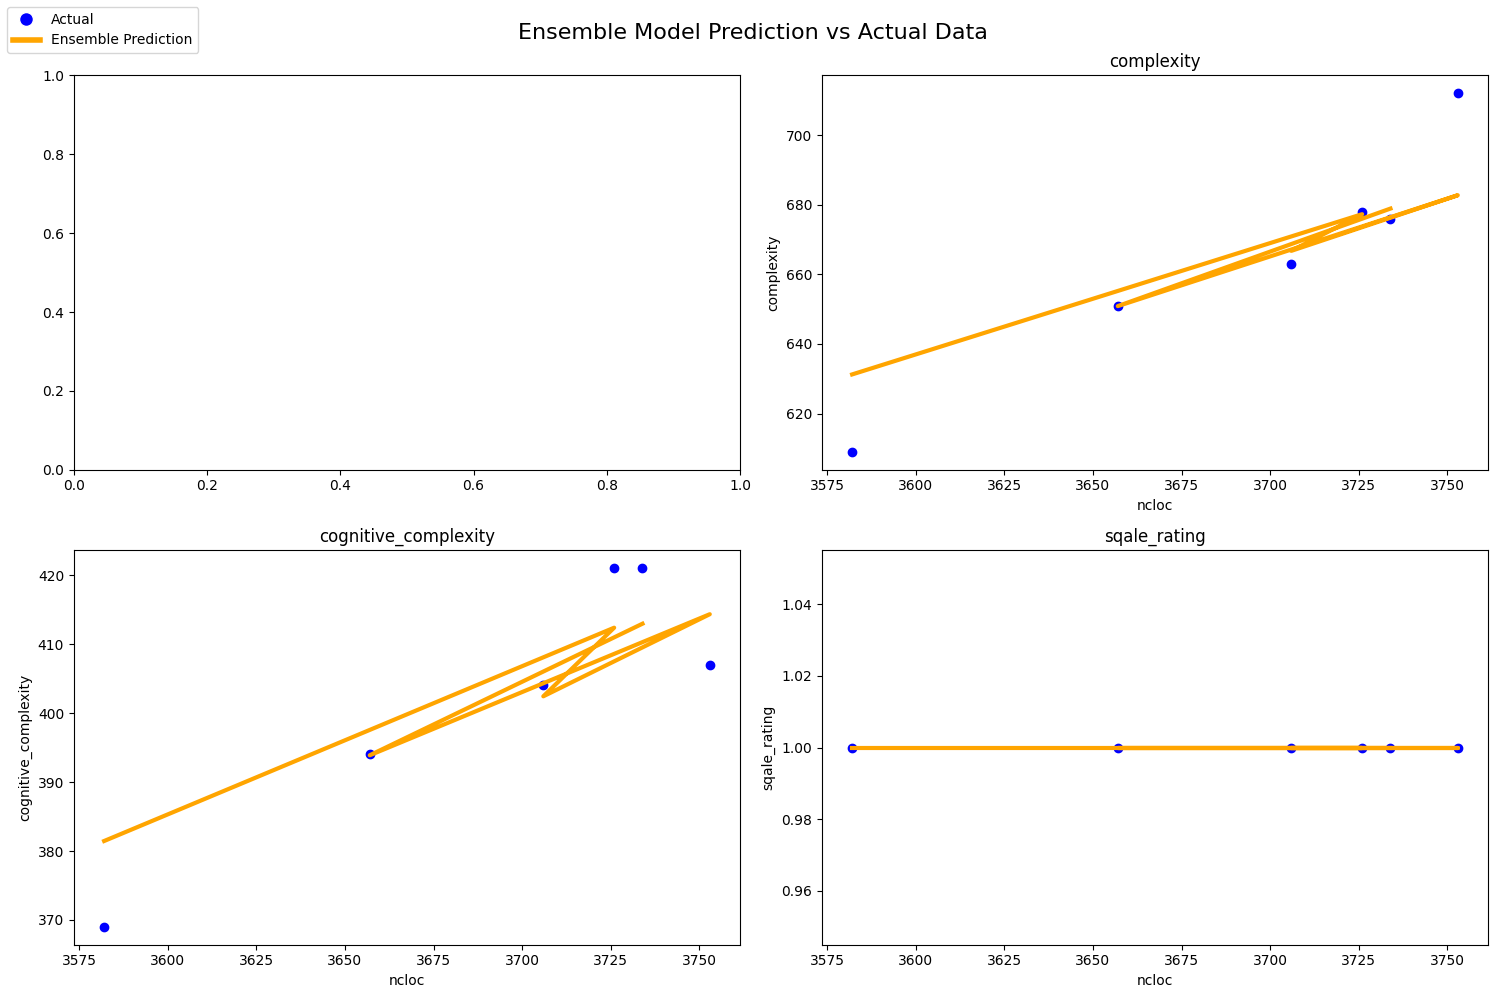

In [23]:
# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Define the Ensemble model
models = {
    'Ensemble': VotingRegressor([('SVM', SVR(kernel='linear')), ('Decision Tree', DecisionTreeRegressor(random_state=42))])
}

# Create custom legend handles and labels
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Actual', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], color='orange', lw=4, label='Ensemble Prediction')]

# Loop over each target variable
for i, target in enumerate(target_columns):
    y = df[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Evaluate the Ensemble model
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        results[name] = {'MSE': mse, 'R-squared': r2}

        # Scatter plot of actual data points
        scatter = axs[(i+1)//2, (i+1)%2].scatter(X_test, y_test, color='blue')

        # Regression line
        line = axs[(i+1)//2, (i+1)%2].plot(X_test, predictions, linewidth=3, color='orange')

        axs[(i+1)//2, (i+1)%2].set_title(f'{target}')
        axs[(i+1)//2, (i+1)%2].set_xlabel('ncloc')
        axs[(i+1)//2, (i+1)%2].set_ylabel(target)

    # Display results
    for name, metrics in results.items():
        print(f"{name} Model for {target}:")
        print(f"Mean Squared Error: {metrics['MSE']}")
        print(f"R-squared: {metrics['R-squared']}")
        print()

# Add the legend to the figure
fig.legend(handles=legend_elements, loc='upper left')

# Set a general title for the figure
fig.suptitle('Ensemble Model Prediction vs Actual Data', fontsize=16)

plt.tight_layout()
plt.show()